<a href="https://colab.research.google.com/github/giacomobinco/FDS-Final-Project/blob/main/fma_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Loading all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import zipfile

import librosa
import librosa.display

In [14]:
# Cloning the GitHub repos of the "fma_small" dataset and the metadata
# [ !! It takes about 5 minutes !! ]

!wget https://os.unil.cloud.switch.ch/fma/fma_small.zip
!wget https://os.unil.cloud.switch.ch/fma/fma_metadata.zip

--2025-11-27 09:07:59--  https://os.unil.cloud.switch.ch/fma/fma_small.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7679594875 (7.2G) [application/zip]
Saving to: ‘fma_small.zip’

fma_small.zip       100%[===================>]   7.15G  24.7MB/s    in 5m 19s  

2025-11-27 09:13:19 (22.9 MB/s) - ‘fma_small.zip’ saved [7679594875/7679594875]

--2025-11-27 09:13:19--  https://os.unil.cloud.switch.ch/fma/fma_metadata.zip
Resolving os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)... 86.119.28.16, 2001:620:5ca1:201::214
Connecting to os.unil.cloud.switch.ch (os.unil.cloud.switch.ch)|86.119.28.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358412441 (342M) [application/zip]
Saving to: ‘fma_metadata.zip’

fma_metadata.zip    100%[===================>] 341.81

In [15]:
# Unzipping the two folders previously loaded
# [ !! It takes about 15 minutes !! ]

for zip_path in ["fma_small.zip", "fma_metadata.zip"]:
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall()

In [16]:
# Generating four tables (from the metadata) with information regarding the 8.000 audio tracks

tracks = pd.read_csv('fma_metadata/tracks.csv', index_col = 0, header = [0, 1])
genres = pd.read_csv('fma_metadata/genres.csv', index_col = 0)
features = pd.read_csv('fma_metadata/features.csv', index_col = 0, header = [0, 1, 2])
echonest = pd.read_csv('fma_metadata/echonest.csv', index_col = 0, header = [0, 1, 2])

# Printing their shape to check if they've been correctly generated

print("Tracks:", tracks.shape)
print("Genres:", genres.shape)
print("Features:", features.shape)
print("Echonest:", echonest.shape)

Tracks: (106574, 52)
Genres: (163, 4)
Features: (106574, 518)
Echonest: (13129, 249)


ChatGPT regarding the file *features.csv*:

"Sono feature pre-estratte dall’audio usando *librosa*, ma non sono spettrogrammi completi. Non sono dunque adatte per CNN: non sono matrici tempo-frequenza, quanto più valori aggregati."

In [20]:
# Getting the path of a specific audio track

track_id = 2
track_id_str = f"{track_id:06d}"

audio_path = f"fma_small/{track_id_str[:3]}/{track_id_str}.mp3"
audio_path

'fma_small/000/000002.mp3'

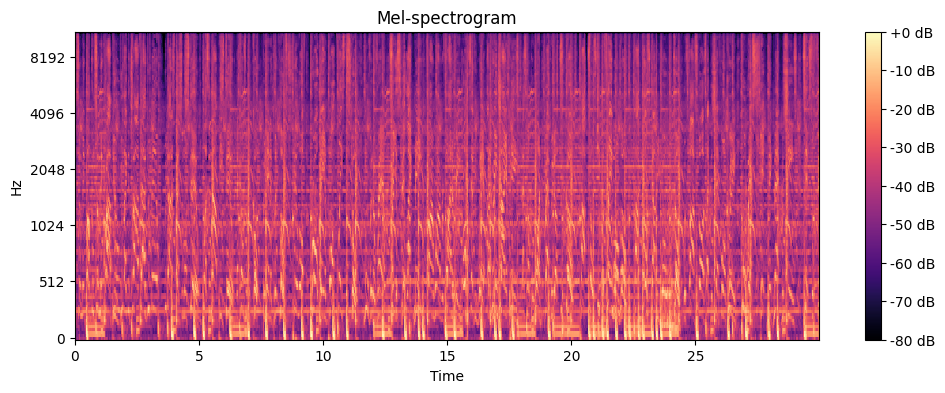

In [21]:
# Generating the Mel-spectrogram for the previously identified audio track

# y is a 1-D numpy array with the audio
y, sr = librosa.load(audio_path, sr = 22050)

S = librosa.feature.melspectrogram(
    y = y,
    sr = sr,
    n_fft = 2048,
    hop_length = 512,
    n_mels = 128
)

S_dB = librosa.power_to_db(S, ref = np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_dB, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'mel')
plt.colorbar(format = "%+2.f dB")
plt.title("Mel-spectrogram")
plt.show()

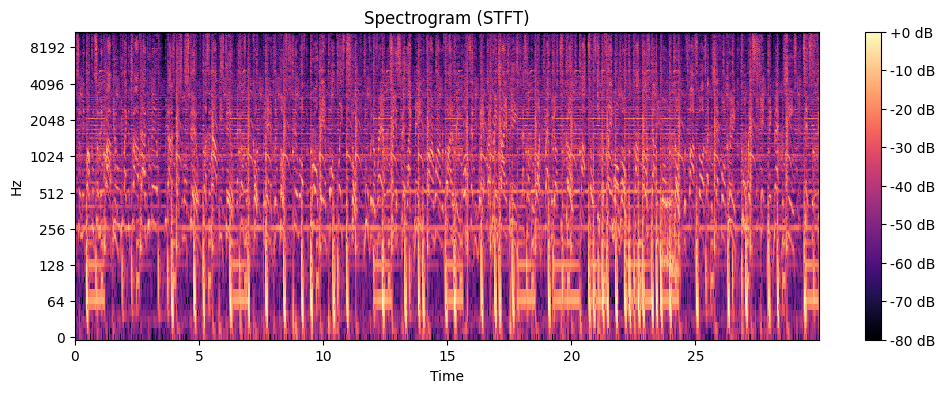

In [22]:
D = librosa.stft(y, n_fft = 2048, hop_length = 512)
S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr = sr, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar(format="%+2.f dB")
plt.title("Spectrogram (STFT)")
plt.show()